In [ ]:
import numpy as np
import matplotlib.pylab as plt
from matplotlib import animation, rc # librería de animaciones
rc('animation', html='html5') #para poder ver la animacion en formato inline
from IPython.display import HTML
from ipywidgets import interact

In [ ]:
# Algunas constantes del problema
m_a = 1. # kg
m_b = 1. # kg
g = 9.81 # en m/s^2
l = 1. # m
k = 1. # N/m

M = m_a + m_b # kg 
mu = m_a*m_b/M # kg

w_1 = np.sqrt(g/l)
w_2 = np.sqrt(g/l + k/mu)
v_1=np.array([1.,1.])
v_2=np.array([1.,-m_a/m_b])
T_1=2*np.pi/w_1
T_2=2*np.pi/w_2

alfa = M / m_b

w_prom = (w_1 + w_2) / 2.
w_dif = (w_2 - w_1) / 2.

T_dif = 2*np.pi/w_dif

Psi_b0=0.05

In [ ]:
def modo_1(t):
  return 0.1*l*v_1*np.cos(w_1*t)
def modo_2(t):
  return 0.1*l*v_2*np.cos(w_2*t)
def pos_a(t):
    return 2*Psi_b0*np.sin(w_prom*t)*np.sin(w_dif*t)/alfa
def pos_b(t):
    return Psi_b0*np.cos(w_prom*t)*np.cos(w_dif*t) + Psi_b0*(2/alfa - 1)*np.sin(w_prom*t)*np.sin(w_dif*t)

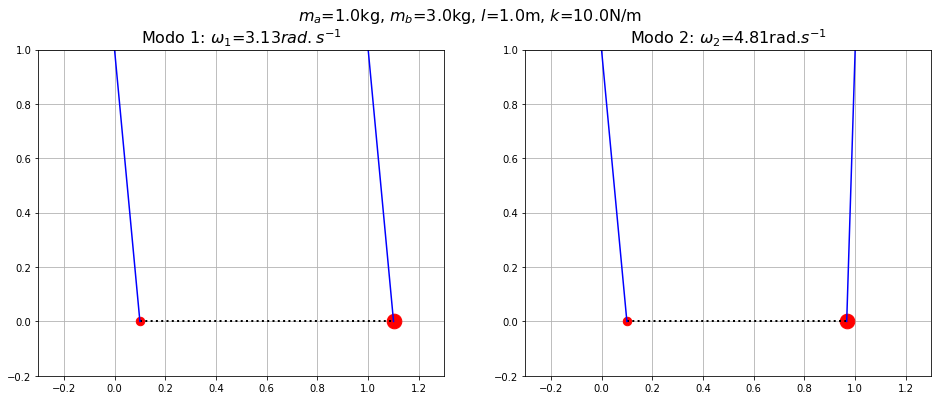

In [ ]:
 
#PARAMETROS PARA JUGAR
m_a = 1. # [kg]
m_b = 3. # [kg]
l = 1. # [m]
k = 10. # [N/m]
 
#-----------------
g = 9.81 # [m/s^2]
M = m_a + m_b # [kg] 
mu = m_a*m_b/M # [kg]
w_1 = np.sqrt(g/l)
w_2 = np.sqrt(g/l + k/mu)
v_1=np.array([1.,1.])
v_2=np.array([1.,-m_a/m_b])
T_1=2*np.pi/w_1
T_2=2*np.pi/w_2
t=np.linspace(0,3*max(T_1,T_2),int(90*max(T_1,T_2)/min(T_1,T_2)))
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(16,6))
fig.suptitle('$m_{a}$='+str(m_a)+'kg, $m_{b}$='+str(m_b)+'kg, $l$='+str(l)+
             'm, $k$='+str(k)+'N/m', fontsize=16)
ax1.set_title('Modo 1: $\omega_{1}$='+str(np.round(w_1,2))+'rad.$s^{-1}$',fontsize=16)
ax1.set_xlim(-0.8*l+l/2,0.8*l+l/2);
ax1.set_ylim(-0.2*l,l);
ax2.set_title('Modo 2: $\omega_{2}$='+str(np.round(w_2,2))+'rad.$s^{-1}$',fontsize=16)
ax2.set_xlim(-0.8*l+l/2,0.8*l+l/2);
ax2.set_ylim(-0.2*l,l);
ax1.grid(True)
ax2.grid(True)
# MODO 1
lineA1, = ax1.plot([], [],'ro', markersize=15*np.sqrt(m_a/np.pi)); # MASA A
lineB1, = ax1.plot([], [],'ro', markersize=15*np.sqrt(m_b/np.pi)); # MASA B
line1, = ax1.plot([], [],'k:',linewidth=2);                        # RESORTE
line2, = ax1.plot([], [],'b-');                                    # PENDULO A
line3, = ax1.plot([], [],'b-');                                    # PENDULO B
# MODO 2
lineA2, = ax2.plot([], [],'ro', markersize=15*np.sqrt(m_a/np.pi)); # MASA A
lineB2, = ax2.plot([], [],'ro', markersize=15*np.sqrt(m_b/np.pi)); # MASA B
line4, = ax2.plot([], [],'k:',linewidth=2);                        # RESORTE
line5, = ax2.plot([], [],'b-');                                    # PENDULO A
line6, = ax2.plot([], [],'b-');                                    # PENDULO B
 
def animate_modes(i):
    X1 = [modo_1(t[i])[0],l+modo_1(t[i])[1]]
    Y1 = [0,0]
    X2 = [modo_2(t[i])[0],l+modo_2(t[i])[1]]
    Y2 = [0,0]
    lineA1.set_data(X1[0],Y1[0])
    lineB1.set_data(X1[1],Y1[1])
    line1.set_data(X1,Y1)
    line2.set_data([0,modo_1(t[i])[0]],[l,0])
    line3.set_data([l,l+modo_1(t[i])[1]],[l,0])
    lineA2.set_data(X2[0],Y2[0])
    lineB2.set_data(X2[1],Y2[1])
    line4.set_data(X2,Y2)
    line5.set_data([0,modo_2(t[i])[0]],[l,0])
    line6.set_data([l,l+modo_2(t[i])[1]],[l,0])
    return (line1,)
 
anim = animation.FuncAnimation(fig, animate_modes, frames=len(t), interval=np.diff(t)[0]*1000) #interval:Delay between frames in milliseconds.
anim

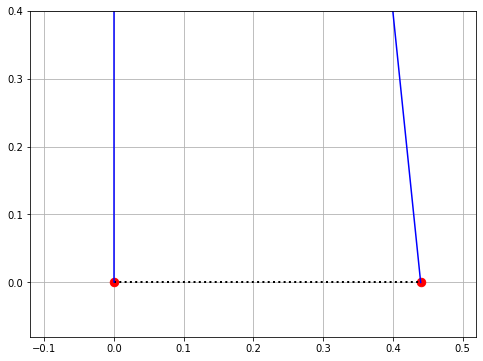

In [ ]:
 
#PARAMETROS PARA JUGAR
m_a = 1. # kg
m_b = 1. # kg
l = .4 # m
k = .8 # N/m
Psi_b0=0.1*l #Desplazamiento inicial masa b
 
 
#------------------
g = 9.81 # en m/s^2
M = m_a + m_b # kg 
mu = m_a*m_b/M # kg
w_1 = np.sqrt(g/l)
w_2 = np.sqrt(g/l + k/mu)
alfa = M / m_b
w_prom = (w_1 + w_2) / 2.
w_dif = (w_2 - w_1) / 2.
T_prom= 2*np.pi/w_prom
T_dif = 2*np.pi/w_dif
 
t=np.linspace(0,T_dif/2,int(20*T_dif/T_prom))
var1=pos_a(t) #variable 1 que quiero animar
var2=pos_b(t) #variable 2 que quiero animar
 
fig, ax = plt.subplots(figsize=(8,6))
ax.set_xlim(-0.8*l+l/2,0.8*l+l/2);
ax.set_ylim(-0.2*l,l);
ax.grid(True)
 
lineA, = ax.plot([], [],'ro', markersize=15*np.sqrt(m_a/np.pi)); # MASA A
lineB, = ax.plot([], [],'ro', markersize=15*np.sqrt(m_b/np.pi)); # MASA B
line1, = ax.plot([], [],'k:',linewidth=2);                        # RESORTE
line2, = ax.plot([], [],'b-');                                    # PENDULO A
line3, = ax.plot([], [],'b-');                                    # PENDULO B
 
def animate(i):
    X = [var1[i],l+var2[i]]
    Y = [0,0]
    lineA.set_data(X[0],Y[0])
    lineB.set_data(X[1],Y[1])
    line1.set_data(X,Y)
    line2.set_data([0,var1[i]],[l,0])
    line3.set_data([l,l+var2[i]],[l,0])
    return (line1,)
anim2 = animation.FuncAnimation(fig, animate, frames=len(t), interval=np.diff(t)[0]*1000)

In [ ]:
anim2